In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib
from scipy.stats import normaltest
warnings.filterwarnings("ignore")
%matplotlib inline

In [41]:
data = pd.read_csv('/content/student.csv')

In [42]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [43]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   909 non-null    float64
 6   reading score                941 non-null    float64
 7   writing score                942 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,909.0,66.124312,15.042705,0.0,57.0,66.0,76.0,100.0
reading score,941.0,69.210414,14.636385,17.0,59.0,70.0,79.0,100.0
writing score,942.0,67.946921,15.235151,10.0,57.0,69.0,78.0,100.0


In [46]:
data.shape

(1000, 8)

In [47]:
num_col = [feature for feature in data.columns if data[feature].dtype!='O']

In [48]:
cat_col = [feature for feature in data.columns if data[feature].dtype =='O']

In [49]:
for col in cat_col:
    print(data[col].value_counts(normalize=True) * 100)
    

female    51.8
male      48.2
Name: gender, dtype: float64
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64
standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64
none         64.2
completed    35.8
Name: test preparation course, dtype: float64


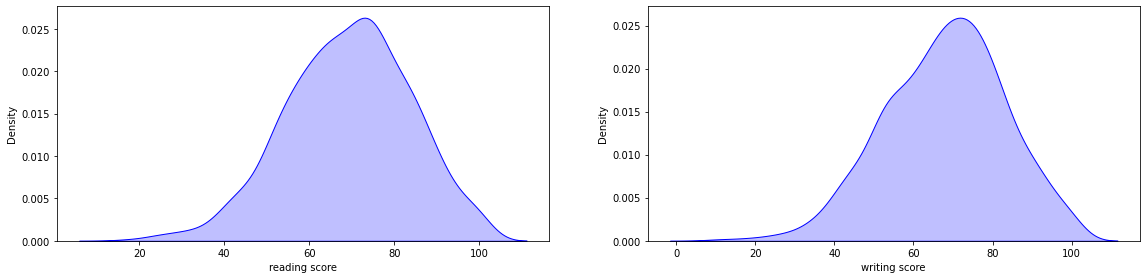

In [50]:
#UA of Num Values
plt.figure(figsize=(30, 25))
for i in range(1, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])

In [51]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


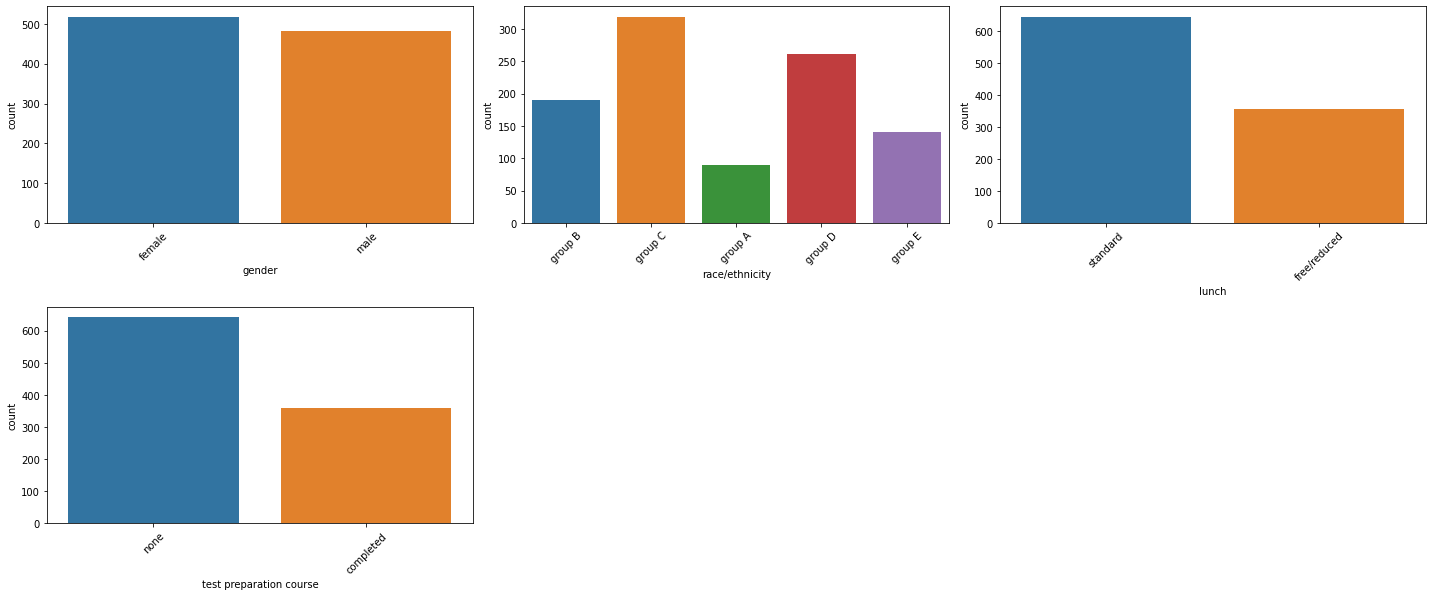

In [52]:
#UA of Cat Values
plt.figure(figsize=(20, 20))
cat = ['gender', 'race/ethnicity','lunch', 'test preparation course']
for i in range(0, len(cat)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=data[cat[i]])
    plt.xlabel(cat[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [53]:
data.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     91
reading score                  59
writing score                  58
dtype: int64

In [54]:
data['math score'] = data['math score'].replace(np.nan,data['math score'].mean())
data['reading score'] = data['reading score'].replace(np.nan,data['reading score'].mean())
data['writing score'] = data['writing score'].replace(np.nan,data['writing score'].mean())

In [55]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [56]:
data['math score'] = np.sqrt(data['math score'])
data['reading score'] = np.sqrt(data['reading score'])
data['writing score'] = np.sqrt(data['writing score'])

In [57]:
data[(list(data.columns)[1:])].corr()

,math score,reading score,writing score
math score,1.00000,0.767850,0.749870
reading score,0.76785,1.000000,0.914634
writing score,0.74987,0.914634,1.000000


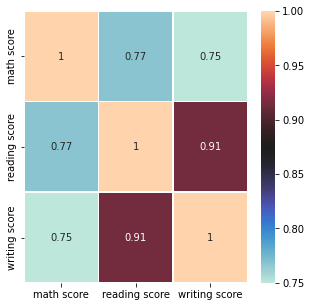

In [58]:
#corr between variable
sns.heatmap(data.corr(),annot=True,cmap='icefire',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

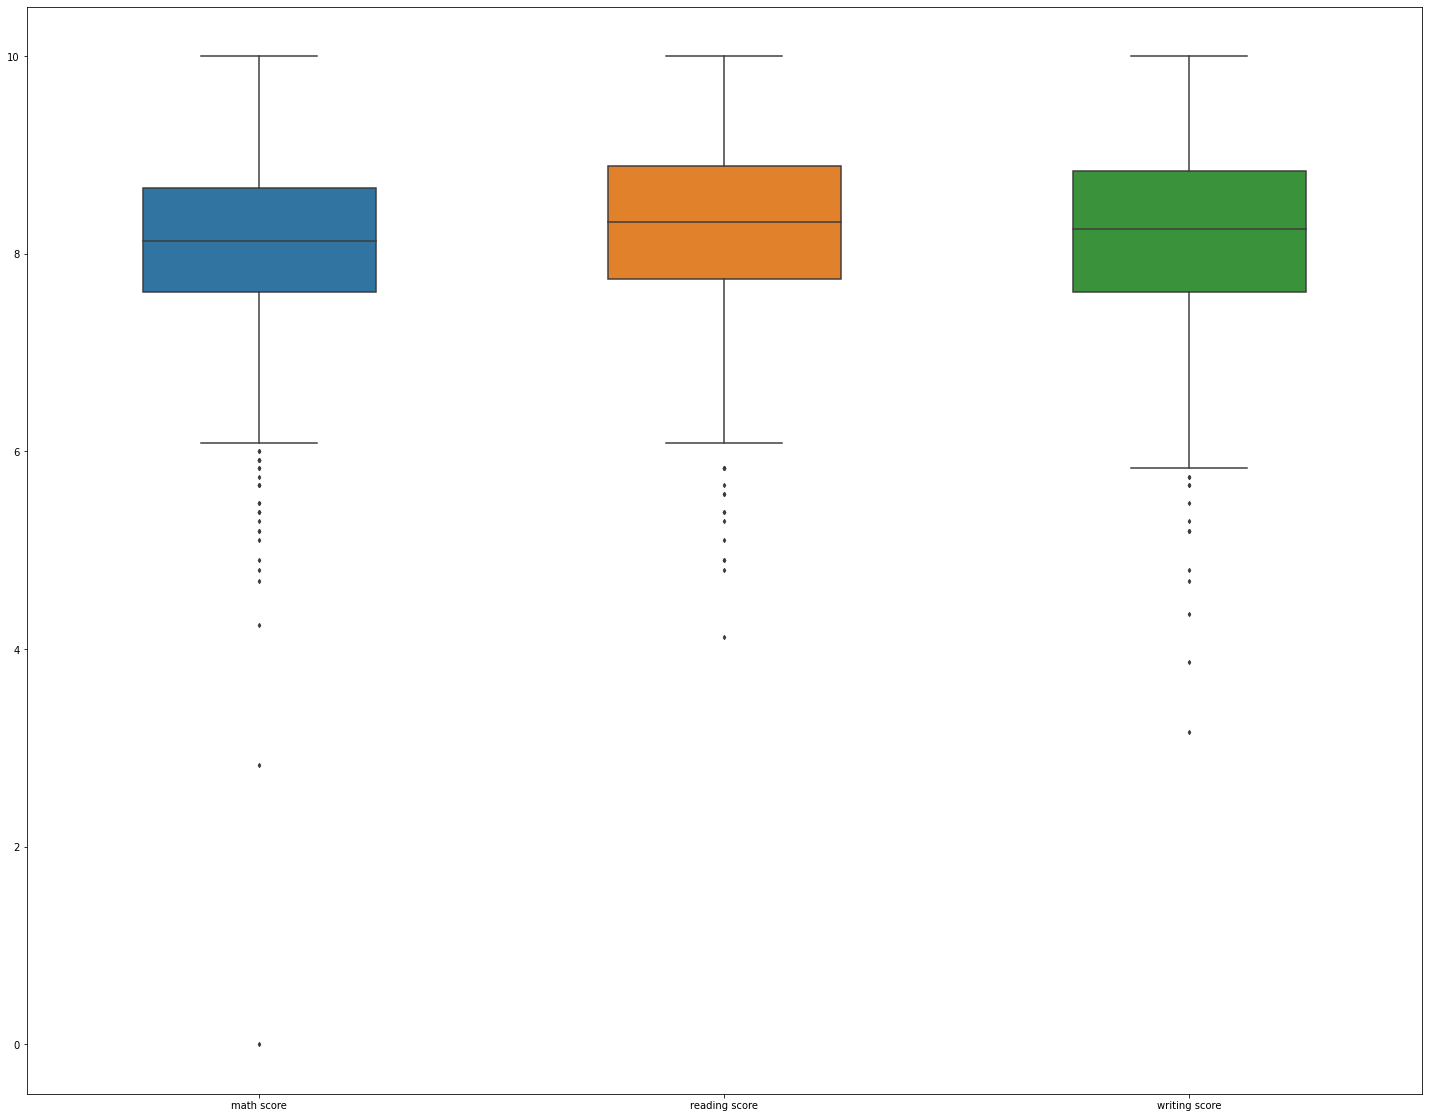

In [59]:
fig, ax = plt.subplots(figsize=(25,20))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [60]:
data_n = data.drop(['parental level of education'], axis=1)

In [61]:
data_n

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,female,group B,standard,none,8.485281,8.485281,8.602325
1,female,group C,standard,completed,8.306624,9.486833,9.380832
2,female,group B,standard,none,9.486833,9.746794,9.643651
3,male,group A,free/reduced,none,6.855655,7.549834,6.633250
4,male,group C,standard,none,8.717798,8.831761,8.660254
...,...,...,...,...,...,...,...
995,female,group E,standard,completed,9.380832,9.949874,9.746794
996,male,group C,free/reduced,none,7.874008,7.416198,7.416198
997,female,group C,free/reduced,completed,7.681146,8.426150,8.062258
998,female,group D,standard,completed,8.246211,8.831761,8.774964


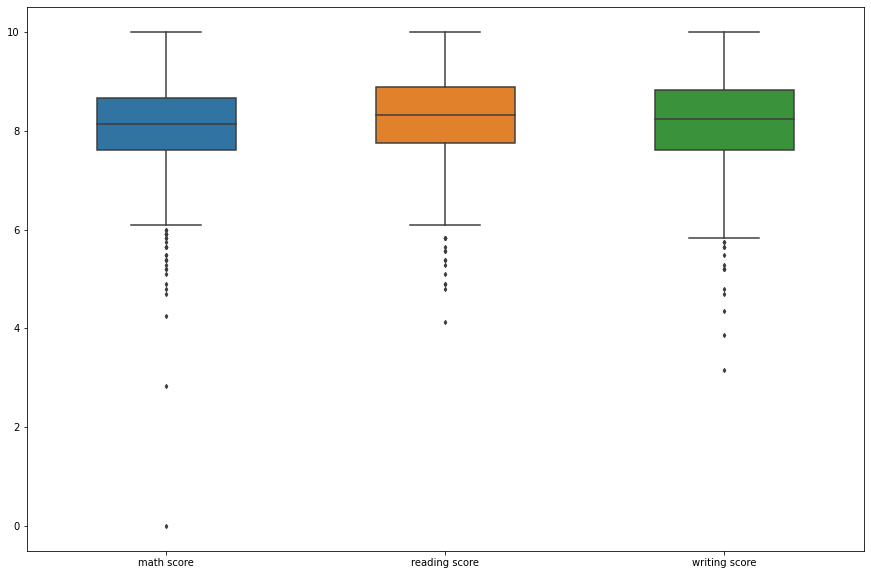

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_n, width= 0.5,ax=ax,  fliersize=3)

In [63]:
from sklearn.preprocessing import LabelEncoder
le_classes = LabelEncoder()
data_n['gender'] = le_classes.fit_transform(data_n['gender'])
data_n['race/ethnicity'] = le_classes.fit_transform(data_n['race/ethnicity'])
data_n['lunch'] = le_classes.fit_transform(data_n['lunch'])
data_n['test preparation course'] = le_classes.fit_transform(data_n['test preparation course'])

In [64]:
data_n

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,8.485281,8.485281,8.602325
1,0,2,1,0,8.306624,9.486833,9.380832
2,0,1,1,1,9.486833,9.746794,9.643651
3,1,0,0,1,6.855655,7.549834,6.633250
4,1,2,1,1,8.717798,8.831761,8.660254
...,...,...,...,...,...,...,...
995,0,4,1,0,9.380832,9.949874,9.746794
996,1,2,0,1,7.874008,7.416198,7.416198
997,0,2,0,0,7.681146,8.426150,8.062258
998,0,3,1,0,8.246211,8.831761,8.774964


In [65]:
X = data_n.drop(columns = ['gender'])
y = data_n['gender']

In [66]:
X

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,1,1,1,8.485281,8.485281,8.602325
1,2,1,0,8.306624,9.486833,9.380832
2,1,1,1,9.486833,9.746794,9.643651
3,0,0,1,6.855655,7.549834,6.633250
4,2,1,1,8.717798,8.831761,8.660254
...,...,...,...,...,...,...
995,4,1,0,9.380832,9.949874,9.746794
996,2,0,1,7.874008,7.416198,7.416198
997,2,0,0,7.681146,8.426150,8.062258
998,3,1,0,8.246211,8.831761,8.774964


In [67]:
y

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: gender, Length: 1000, dtype: int64

In [68]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [69]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [70]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

vif

,vif,Features
0,1.041162,race/ethnicity
1,1.130289,lunch
2,1.149399,test preparation course
3,2.714678,math score
4,6.867333,reading score
5,6.857888,writing score


In [71]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 0)

In [72]:
from sklearn.ensemble import RandomForestClassifier
rand_reg = RandomForestClassifier()

rand_reg.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_pred = rand_reg.predict(x_test)

In [74]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.86